In [1]:
import numpy as np
import h5py
from tools import *
from matplotlib import pyplot as plt 
import pandas as pd
import random as rand
from scipy.stats import zscore
from constant import *

In [2]:
h5_datas = h5py.File("../ml_project_data/h5/X_train.h5/X_train.h5","r")
index_win = h5_datas['index_window']
y_train = pd.read_csv('../ml_project_data/h5/y_train.csv').values

In [3]:
def record(index):
    return h5_datas["eeg_1"][sorted(index)]

In [4]:
len_sample = 50
samples_0 =rand.sample([record[0] for record in y_train if record[1] == 0],len_sample)
samples_1 =rand.sample([record[0] for record in y_train if record[1] == 1],len_sample)
samples_2 =rand.sample([record[0] for record in y_train if record[1] == 2],len_sample)
samples_3 =rand.sample([record[0] for record in y_train if record[1] == 3],len_sample)
samples_4 =rand.sample([record[0] for record in y_train if record[1] == 4],len_sample)
all_samples_index = np.array([samples_0,samples_1,samples_2,samples_3,samples_4]).ravel()

In [5]:
# all_samples_index = np.array(list(GOOD_SAMPLES.values())).ravel()
# all_samples_index.shape

In [6]:
# artefact_beginning = np.where(np.array(index_win) == 0)[0]
# artefact_beginning

In [7]:
# new_all_samples_index = []
# removed = 0
# for i in all_samples_index :
#     if i not in artefact_beginning :
#         new_all_samples_index.append(i)
#     else :
#         removed +=1 
# removed

In [8]:
all_samples = record(all_samples_index)

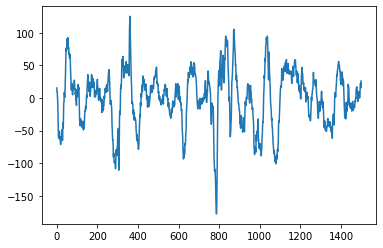

In [9]:
plt.plot(all_samples[7])

Des valeurs aberrantes sous forme de minimum ou de maximum trop grands

In [10]:
# all_samples_minmax = np.array([[np.abs(np.min(sample)),np.max(sample)] for sample in all_samples])
# plt.plot(all_samples_minmax[:,0])
# plt.plot(all_samples_minmax[:,1])

In [11]:
# all_samples_minmax = np.array([[np.abs(np.min(sample)),np.max(sample)] for sample in all_samples])
# new_all_samples_minmax , new_all_indexes = remove_abnormal_values(all_samples_minmax,all_samples_index)

In [12]:
# new_all_samples = record(new_all_indexes)

In [13]:
treated_samples = np.array([treat_record_welch(eeg,POWER_BANDS,50) for eeg in all_samples])

Tentative d'enlever les outliers

In [14]:
# z_scores = zscore(treated_samples)
# abs_z_scores = np.abs(z_scores)
# filtered_entries = (abs_z_scores < 3).all(axis=1)
# treated_samples = treated_samples[filtered_entries]
# all_samples_index = all_samples_index[filtered_entries]

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
# Normalize the dataset
treated_samples = scale(treated_samples)
pca = PCA()
pca.fit(treated_samples);

In [16]:
pca.explained_variance_ratio_

array([0.5637079 , 0.24979715, 0.10812023, 0.07837466], dtype=float32)

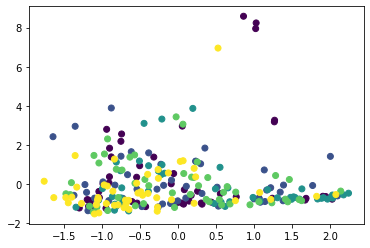

In [17]:
plt.scatter(pca.transform(treated_samples)[:,1],pca.transform(treated_samples)[:,0],c=y_train[all_samples_index][:,1])
# plt.scatter(treated_samples[:,0],treated_samples[:,1],c=y_train[all_samples_index][:,1])

In [18]:
import skfuzzy as fuzz
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        pca.transform(treated_samples).T, 5, 2, error=0.005, maxiter=1000, init=None)
# cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
#          treated_samples.T, 5, 2, error=0.005, maxiter=1000, init=None)

In [19]:
u, u0, d, jm, p, fpc = fuzz.cluster.cmeans_predict(
    pca.transform(treated_samples).T, cntr, 5, error=0.005, maxiter=1000)
# u, u0, d, jm, p, fpc = fuzz.cluster.cmeans_predict(
#     treated_samples.T, cntr, 5, error=0.005, maxiter=1000)

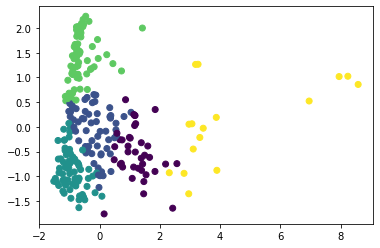

In [20]:
plt.scatter(pca.transform(treated_samples)[:,0],pca.transform(treated_samples)[:,1],c=np.argmax(u,axis=0))
# plt.scatter(treated_samples[:,0],treated_samples[:,1],c=np.argmax(u,axis=0))

In [21]:
np.argmax(u,axis=0)

array([3, 3, 2, 1, 1, 0, 2, 1, 1, 1, 1, 2, 1, 2, 2, 3, 3, 2, 2, 0, 2, 2,
       4, 4, 2, 2, 1, 1, 4, 4, 1, 4, 2, 3, 3, 1, 4, 1, 3, 1, 3, 0, 0, 1,
       4, 0, 1, 2, 0, 2, 4, 2, 4, 3, 3, 3, 2, 0, 2, 1, 1, 0, 1, 2, 0, 2,
       1, 2, 3, 3, 3, 1, 1, 1, 3, 1, 3, 1, 1, 2, 3, 0, 0, 0, 3, 3, 1, 1,
       2, 0, 2, 1, 0, 3, 3, 2, 2, 2, 3, 0, 2, 4, 3, 3, 2, 3, 2, 3, 2, 3,
       0, 3, 2, 0, 2, 3, 1, 0, 3, 3, 3, 2, 3, 3, 3, 0, 1, 1, 3, 3, 1, 3,
       2, 0, 1, 3, 3, 3, 4, 3, 4, 3, 2, 0, 0, 3, 2, 1, 2, 1, 3, 3, 3, 3,
       3, 1, 1, 0, 0, 3, 3, 3, 1, 3, 1, 0, 1, 1, 1, 1, 4, 2, 2, 2, 2, 4,
       2, 2, 1, 0, 1, 1, 3, 0, 0, 2, 2, 3, 0, 0, 3, 1, 3, 2, 1, 4, 2, 3,
       1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 4, 2, 2, 2, 2, 2, 3, 0, 3,
       1, 3, 1, 2, 1, 1, 1, 1, 0, 2, 1, 3, 2, 2, 1, 2, 1, 0, 3, 0, 2, 0,
       2, 2, 2, 2, 1, 2, 2, 0])

In [22]:
y_train[all_samples_index][:,1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4])